# Cognetti - Hands on Assignment 1
# AIT664
# September 30, 2024

---
#### Setup and Imports

In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML

Check Working Directory

In [5]:
os.getcwd()

'C:\\Users\\iruka\\OneDrive\\Documents\\Graduate Program\\Fall 2024\\AIT 664\\Project\\Project Workspace'

# Data Inspection
##  Load the Data

In [7]:
#Low memory to false, otherwise error
airbnb_df = pd.read_csv("Airbnb_Open_Data.csv", sep=",",low_memory=False)

In [8]:
airbnb_df.head(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,...,$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,...,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


In [9]:
airbnb_df.tail(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102589,6089676,Lrg room 1 block from Prospect Park,74549151787,unconfirmed,Dave,Brooklyn,Flatbush,40.65231,-73.96189,United States,...,$61,3.0,0.0,NaN,NaN,1.0,1.0,200.0,House Rules 1. Check-in is 4 pm local time. If...,NaN
102590,6090228,Wonderful artists' loft in Brooklyn,9184535139,unconfirmed,Daniel,Brooklyn,Crown Heights,40.66673,-73.96127,United States,...,$50,1.0,0.0,NaN,NaN,1.0,1.0,276.0,#NAME?,NaN
102591,6090781,Columbus Ave Apt 1 block from Park,50908010324,verified,Lawrence,Manhattan,Upper West Side,40.77408,-73.98181,United States,...,$228,5.0,17.0,1/4/2019,0.35,5.0,1.0,134.0,#NAME?,NaN
102592,6091333,3BR/1 Ba in TriBeCa w/ outdoor deck,53266862889,unconfirmed,Nick,Manhattan,Tribeca,40.71845,-74.01183,United States,...,$157,1.0,0.0,NaN,NaN,2.0,1.0,177.0,Guests should treat my home as if it were thei...,NaN
102593,6091885,"Welcoming, Clean, Cheap on St Marks",33188605074,verified,Felipe,Manhattan,East Village,40.72826,-73.98422,United States,...,$220,1.0,8.0,9/6/2015,0.16,4.0,2.0,152.0,* No smoking indoors. * No pets * No loud/la...,NaN
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


Reviewing the header and tail gives us a good idea of the various errors we will see in cleanup.

## Understand the Data Structure

In [12]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Most of the data appears to have loaded with a raasonable data type.  Construction Year should stay four digits, so it will have to be turned to an integer. Price and Service Fee are numbers, and thus should have the "$" removed.

In [14]:
#Grabbing the total number at the start
start_rows = airbnb_df.shape[0]
print(f"Starting number of rows: {start_rows}")

Starting number of rows: 102599


In [15]:
airbnb_df.price.describe()

count     102352
unique      1151
top        $206 
freq         137
Name: price, dtype: object

In [16]:
airbnb_df['service fee'].describe()

count     102326
unique       231
top         $41 
freq         526
Name: service fee, dtype: object

Price and Service Fee are numbers, and thus should have the "$" removed. Not seen in this "Describe" for service fee, but seen in price and the head/tail records above

## Identify Missing Values

In [19]:
# Missing values as a %
for column in airbnb_df.columns:
    missing_percentage = airbnb_df[column].isnull().mean() * 100
    print(f"Column \"{column}\" is missing {missing_percentage:.2f}% values.")

Column "id" is missing 0.00% values.
Column "NAME" is missing 0.24% values.
Column "host id" is missing 0.00% values.
Column "host_identity_verified" is missing 0.28% values.
Column "host name" is missing 0.40% values.
Column "neighbourhood group" is missing 0.03% values.
Column "neighbourhood" is missing 0.02% values.
Column "lat" is missing 0.01% values.
Column "long" is missing 0.01% values.
Column "country" is missing 0.52% values.
Column "country code" is missing 0.13% values.
Column "instant_bookable" is missing 0.10% values.
Column "cancellation_policy" is missing 0.07% values.
Column "room type" is missing 0.00% values.
Column "Construction year" is missing 0.21% values.
Column "price" is missing 0.24% values.
Column "service fee" is missing 0.27% values.
Column "minimum nights" is missing 0.40% values.
Column "number of reviews" is missing 0.18% values.
Column "last review" is missing 15.49% values.
Column "reviews per month" is missing 15.48% values.
Column "review rate numbe

As discussed during our presentation, there are not many consequential fields that are null.  Most columns with missing values are under a half of a percent of the total rows, so they can simply be removed without much consequence.

Of note, license is completely blank. This column will not be touched.

# Data Preprocessing
## Handling Missing Values

As discussed during our presentation, there are not many consequential fields that are null. However, there are a number of columns we can improve. 

- Id, Name, Host id, host verified, and host name are identifiers and not consequential, remaining untouched

- Neighborhood/Neighborhood Group columns have numerous typos and missing values

- Lat/Long have some missing valus that will be removed

- Country/Code should all be United States/US

- Instant bookable, cancellation policy, room type, construction year have a small number of missing records that will be removed

- Price and Service fee need to have their "$" removed

- Minimum Number of nights will require some special treatment, discussed below

- Number of reviews has few null records, so they will be removed

- Last Review & Reviews Per Month are unconsequential for the focus of this initial review and will remain untouched

- Review Rate does not have much context behind it, but has few null records

- Calculated Host Listings Count has few null records

- Availability 365 will also require special treatment, discussed below

- House Rules is only populated in half of our data set, when using this feature a second data frame will be prepared without null values.

- License is blank, so it will not be touched.

As described in the metadata [1], some of these columns were calculated based on a pull from a "calendar" so we have nulls and negatives for the numbers of days in both the "minimum number" and "availability 365" columns.

### Killing License Column

In [23]:
airbnb_df = airbnb_df.drop(columns=['license'])

### Neighborhood Group and Neighborhood

In [25]:
unique_groups = airbnb_df['neighbourhood group'].unique()
print("Unique neighborhood groups:", unique_groups)

Unique neighborhood groups: ['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']


As these are simply the 5 boroughs of New York, they are easily corrected.

In [27]:
airbnb_df['neighbourhood group'] = airbnb_df['neighbourhood group'].replace({'brookln': 'Brooklyn','manhatan':'Manhattan'})

In [28]:
unique_neighborhoods = airbnb_df['neighbourhood group'].unique()
print("Unique neighborhood groups corrected:", unique_neighborhoods)

Unique neighborhood groups corrected: ['Brooklyn' 'Manhattan' 'Queens' nan 'Staten Island' 'Bronx']


With the null values, we can attempt to replace the missing Neighborhood Group by pulling out the existing relationship and applying it to the data frame.

In [30]:
neighborhood_relation = airbnb_df[['neighbourhood', 'neighbourhood group']]

In [31]:
neighborhood_relation = neighborhood_relation.dropna(subset=['neighbourhood', 'neighbourhood group'])

In [32]:
airbnb_df['neighbourhood group'] = airbnb_df.apply(
    lambda row: neighborhood_relation[neighborhood_relation['neighbourhood'] == row['neighbourhood']]['neighbourhood group'].values[0]
    if pd.isnull(row['neighbourhood group']) and row['neighbourhood'] in neighborhood_relation['neighbourhood'].values
    else row['neighbourhood group'],
    axis=1
)

In [33]:
unique_neighborhoods = airbnb_df['neighbourhood group'].unique()
print("Unique neighborhood groups without null:", unique_neighborhoods)

Unique neighborhood groups without null: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


Success! We have replaced all NA's from the neighborhood groups, but we still have missing neighborhoods.

### Latitude and Longatude
Both of these columns are less than 0.01% of the total, so values will simply be removed.

In [35]:
airbnb_df['lat'].isnull().sum()

8

In [36]:
airbnb_df['long'].isnull().sum()

8

In [37]:
airbnb_df = airbnb_df.dropna(subset=['lat'])

In [38]:
airbnb_df = airbnb_df.dropna(subset=['long'])

In [39]:
airbnb_df['lat'].isnull().sum()

0

In [40]:
airbnb_df['long'].isnull().sum()

0

Rows without Lat/Long are removed.

### Country and Country Code

Any rows missing the United States/US Country and Country Code will have that information filled in.

In [42]:
airbnb_df['country'].isnull().sum()

532

In [43]:
airbnb_df['country code'].isnull().sum()

131

In [44]:
airbnb_df['country'] = airbnb_df['country'].fillna('United States')

In [45]:
airbnb_df['country code'] = airbnb_df['country code'].fillna('US')

In [46]:
airbnb_df['country'].isnull().sum()

0

In [47]:
airbnb_df['country code'].isnull().sum()

0

### Instant Bookable has a very small number of null records, so we can remove them.

In [49]:
airbnb_df['instant_bookable'].isnull().sum()

105

In [50]:
airbnb_df = airbnb_df.dropna(subset=['instant_bookable'])
airbnb_df['instant_bookable'].isnull().sum()

0

### Cancellation Policy
Luckily,  the missing rows from the instant bookable overlap with all missing values for cancellation policy.

In [52]:
airbnb_df['cancellation_policy'].isnull().sum()

0

### Construction Year
We have about 200 Rows missing a year, so we can remove these. However, note the data type change.

In [54]:
airbnb_df['Construction year'].isnull().sum()

204

In [55]:
airbnb_df = airbnb_df.dropna(subset=['Construction year'])

In [56]:
airbnb_df['Construction year'].isnull().sum()

0

Dropping NA's introduces a float, we need to turn this back to an Int for plotting.

In [58]:
airbnb_df['Construction year'] = airbnb_df['Construction year'].astype(int)

In [59]:
airbnb_df['Construction year']

0         2020
1         2007
2         2005
3         2005
4         2009
          ... 
102594    2003
102595    2016
102596    2009
102597    2015
102598    2010
Name: Construction year, Length: 102282, dtype: int32

### Price and Service Fee

There are about 250 rows with null prices, it is a small enough number that we can remove these rows entirely. As the lowest service fee in this data frame is $10, we can assume null service fees indicate 0. These will also be converted to int aas there are no decimal places.

In [61]:
airbnb_df['price'].isnull().sum()

238

In [62]:
airbnb_df['service fee'].isnull().sum()

263

In [63]:
airbnb_df = airbnb_df.dropna(subset=['price'])
airbnb_df['price'].isnull().sum()

0

In [64]:
airbnb_df['service fee'] = airbnb_df['service fee'].fillna(0)
airbnb_df['service fee'].isnull().sum()

0

In [65]:
airbnb_df['price'] = airbnb_df['price'].replace('[\$,]', '', regex=True).astype(int)
airbnb_df['service fee'] = airbnb_df['service fee'].replace('[\$,]', '', regex=True).astype(int)


### Minimum Nights
To remedy "minumum number" column, nulls and negative numbers will be replaced with 1 as this is the minimum for the AirBnB.

In [67]:
airbnb_df['minimum nights'].isnull().sum()

389

In [68]:
#Minimum must be 1
airbnb_df['minimum nights'].fillna(1, inplace=True)

In [69]:
airbnb_df['minimum nights'].isnull().sum()

0

Nulls Replaced

In [71]:
neg_count = (airbnb_df['minimum nights'] < 0).sum()
print(f"Number of negative values in 'minimum nights' column: {neg_count}")

Number of negative values in 'minimum nights' column: 12


As there are only 13 values in the negative, we will also replace these with the minimum "1" night.

In [73]:
#Anything less than 0, go to 1
airbnb_df.loc[airbnb_df['minimum nights'] < 0, 'minimum nights'] = 1

In [74]:
neg_count = (airbnb_df['minimum nights'] < 0).sum()
print(f"Number of negative values in 'minimum nights' column: {neg_count}")

Number of negative values in 'minimum nights' column: 0


Additionally, AirBnB only allows a maximum of 28 days before requiring a contract.  There appears to be a number of listings that are above that limit.

In [76]:
month_count = (airbnb_df['minimum nights'] > 28).sum()
print(f"Number of listings above 28 in 'minimum nights' column: {month_count}")

Number of listings above 28 in 'minimum nights' column: 13840


As the number above 28 is over 10% of our total number of records, further analysis will be necessary on how to handle these records.  AirBnB does allow for longer stays, but this is supposed to be by special contract.

### Number of Reviews
There is a small number of null number of review records, so we can remove these rows.

In [79]:
airbnb_df['number of reviews'].isnull().sum()

182

In [80]:
airbnb_df = airbnb_df.dropna(subset=['number of reviews'])
airbnb_df['number of reviews'].isnull().sum()

0

### Last Review Date
Last Review Date has a large number of nulls, but is not relevant for this review and will remain untouched.

In [82]:
airbnb_df['last review'].isnull().sum()

15702

### Reviews Per Month
Reviews per month has a large number of null values, so we cannot simply remove all missing rows.  This column will be handled as necessary for the data exploration.

In [84]:
airbnb_df['reviews per month'].isnull().sum()

15697

### Review Rate Number
Review Rate number has a small number of null values, so we can remove these rows.

In [86]:
airbnb_df['review rate number'].isnull().sum()

303

In [87]:
airbnb_df = airbnb_df.dropna(subset=['review rate number'])
airbnb_df['review rate number'].isnull().sum()

0

### Calculated Host Listings Count

Calculated host listings count has a small number of null values, so we can remove these rows.

In [89]:
airbnb_df['calculated host listings count'].isnull().sum()

251

In [90]:
airbnb_df = airbnb_df.dropna(subset=['calculated host listings count'])
airbnb_df['calculated host listings count'].isnull().sum()

0

### Availability 365

We will address the "availability 365" column in a slightly different way.  We can assume negative availability is equal to 0 days available, null vales will simply be removed, and any value above 365 will be brought down to 365 days indicating all year.

In [92]:
neg_count = (airbnb_df['availability 365'] < 0).sum()
print(f"Number of negative values in 'availability 365' column: {neg_count}")

Number of negative values in 'availability 365' column: 421


In [93]:
airbnb_df.loc[airbnb_df['availability 365'] < 0, 'availability 365'] = 0

In [94]:
neg_count = (airbnb_df['availability 365'] < 0).sum()
print(f"Number of negative values in 'availability 365' column: {neg_count}")

Number of negative values in 'availability 365' column: 0


Negative rows resolved, now to remove rows with null availability.

In [96]:
airbnb_df['availability 365'].isnull().sum()

356

In [97]:
airbnb_df = airbnb_df.dropna(subset=['availability 365'])
airbnb_df['availability 365'].isnull().sum()

0

In [98]:
airbnb_df.loc[airbnb_df['availability 365'] > 365, 'availability 365'] = 365

### House Rules

There is another subset we can produce in preparation for any natural language proceessing regaring how the house rules of a listing impact the popularity of the property.  Another data frame is created with this cleaned data with any null house rules removed.

In [100]:
airbnb_df['house_rules'].isnull().sum()

51336

In [101]:
airbnb_hr_df = airbnb_df.dropna(subset=['house_rules'])

New data frame created, specifically for use with house rules.

In [103]:
airbnb_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49616 entries, 0 to 102595
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              49616 non-null  int64  
 1   NAME                            49498 non-null  object 
 2   host id                         49616 non-null  int64  
 3   host_identity_verified          49480 non-null  object 
 4   host name                       49382 non-null  object 
 5   neighbourhood group             49616 non-null  object 
 6   neighbourhood                   49609 non-null  object 
 7   lat                             49616 non-null  float64
 8   long                            49616 non-null  float64
 9   country                         49616 non-null  object 
 10  country code                    49616 non-null  object 
 11  instant_bookable                49616 non-null  object 
 12  cancellation_policy             4961

In [104]:
airbnb_hr_df.tail(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
102586,6088019,Patio Oasis in Upper East Side,41141109074,verified,Margaret,Manhattan,Upper East Side,40.77703,-73.94773,United States,...,208,42,4.0,8.0,8/8/2016,0.17,5.0,1.0,159.0,- NO SMOKING (You'll have to do that outside i...
102587,6088571,Adorable One-Bed in Williamsburg!,20914678851,verified,Taylor,Brooklyn,Williamsburg,40.71687,-73.94656,United States,...,388,78,1.0,66.0,6/16/2019,1.35,2.0,1.0,352.0,• Check-in time is 2PM. Check-out time is 11am...
102588,6089124,"Loft Space for Events, Meetings & Shoots",85557432222,unconfirmed,Kalin,Manhattan,Flatiron District,40.74068,-73.98999,United States,...,618,124,1.0,177.0,6/29/2019,3.78,4.0,1.0,365.0,Keep the apartment clean and damage free please.
102589,6089676,Lrg room 1 block from Prospect Park,74549151787,unconfirmed,Dave,Brooklyn,Flatbush,40.65231,-73.96189,United States,...,306,61,3.0,0.0,NaN,NaN,1.0,1.0,200.0,House Rules 1. Check-in is 4 pm local time. If...
102590,6090228,Wonderful artists' loft in Brooklyn,9184535139,unconfirmed,Daniel,Brooklyn,Crown Heights,40.66673,-73.96127,United States,...,250,50,1.0,0.0,NaN,NaN,1.0,1.0,276.0,#NAME?
102591,6090781,Columbus Ave Apt 1 block from Park,50908010324,verified,Lawrence,Manhattan,Upper West Side,40.77408,-73.98181,United States,...,1139,228,5.0,17.0,1/4/2019,0.35,5.0,1.0,134.0,#NAME?
102592,6091333,3BR/1 Ba in TriBeCa w/ outdoor deck,53266862889,unconfirmed,Nick,Manhattan,Tribeca,40.71845,-74.01183,United States,...,787,157,1.0,0.0,NaN,NaN,2.0,1.0,177.0,Guests should treat my home as if it were thei...
102593,6091885,"Welcoming, Clean, Cheap on St Marks",33188605074,verified,Felipe,Manhattan,East Village,40.72826,-73.98422,United States,...,1099,220,1.0,8.0,9/6/2015,0.16,4.0,2.0,152.0,* No smoking indoors. * No pets * No loud/la...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,844,169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,837,167,1.0,1.0,7/6/2015,0.02,2.0,2.0,365.0,House rules: Guests agree to the following ter...


### Special Case for House Rules

Note when reviewing the data, there are a number of house rules rows with "#NAME?" as the only values.  We can remove these values as well.

In [107]:
#How many rows have an excel error???
hr_error_count = (airbnb_hr_df['house_rules'] == "#NAME?").sum()
print(f"Number of #NAME? values in 'house rules' column: {hr_error_count}")

Number of #NAME? values in 'house rules' column: 2678


In [108]:
#Remove the error
airbnb_hr_df = airbnb_hr_df[airbnb_hr_df['house_rules'] != '#NAME?']
hr_error_count = (airbnb_hr_df['house_rules'] == "#NAME?").sum()
print(f"Number of #NAME? values in 'house rules' column: {hr_error_count}")

Number of #NAME? values in 'house rules' column: 0


In [109]:
airbnb_hr_df.tail(10)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
102583,6086362,1 BR apartment sublet.,15723384490,verified,Tassili,Manhattan,Harlem,40.80594,-73.95363,United States,...,247,49,5.0,0.0,NaN,NaN,2.0,1.0,327.0,* No smoking indoors. * No pets * No loud/la...
102585,6087467,Williamsburg family home -3 bedroom,23540078751,verified,Lou,Brooklyn,Williamsburg,40.71558,-73.93926,United States,...,643,129,5.0,4.0,3/27/2016,0.08,5.0,1.0,157.0,* No smoking indoors. * No pets * No loud/la...
102586,6088019,Patio Oasis in Upper East Side,41141109074,verified,Margaret,Manhattan,Upper East Side,40.77703,-73.94773,United States,...,208,42,4.0,8.0,8/8/2016,0.17,5.0,1.0,159.0,- NO SMOKING (You'll have to do that outside i...
102587,6088571,Adorable One-Bed in Williamsburg!,20914678851,verified,Taylor,Brooklyn,Williamsburg,40.71687,-73.94656,United States,...,388,78,1.0,66.0,6/16/2019,1.35,2.0,1.0,352.0,• Check-in time is 2PM. Check-out time is 11am...
102588,6089124,"Loft Space for Events, Meetings & Shoots",85557432222,unconfirmed,Kalin,Manhattan,Flatiron District,40.74068,-73.98999,United States,...,618,124,1.0,177.0,6/29/2019,3.78,4.0,1.0,365.0,Keep the apartment clean and damage free please.
102589,6089676,Lrg room 1 block from Prospect Park,74549151787,unconfirmed,Dave,Brooklyn,Flatbush,40.65231,-73.96189,United States,...,306,61,3.0,0.0,NaN,NaN,1.0,1.0,200.0,House Rules 1. Check-in is 4 pm local time. If...
102592,6091333,3BR/1 Ba in TriBeCa w/ outdoor deck,53266862889,unconfirmed,Nick,Manhattan,Tribeca,40.71845,-74.01183,United States,...,787,157,1.0,0.0,NaN,NaN,2.0,1.0,177.0,Guests should treat my home as if it were thei...
102593,6091885,"Welcoming, Clean, Cheap on St Marks",33188605074,verified,Felipe,Manhattan,East Village,40.72826,-73.98422,United States,...,1099,220,1.0,8.0,9/6/2015,0.16,4.0,2.0,152.0,* No smoking indoors. * No pets * No loud/la...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,844,169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,837,167,1.0,1.0,7/6/2015,0.02,2.0,2.0,365.0,House rules: Guests agree to the following ter...


Rows with "#NAME?' have been removed from our house rules subset.

In [111]:
#Grabbing the total number of rows at the start 
end_rows = airbnb_df.shape[0]
print(f"Ending number of rows: {end_rows}")

Ending number of rows: 100952


In [112]:
reduction = start_rows-end_rows
print(f"These data cleansing efforts have reduced the data set by {reduction} Rows")


These data cleansing efforts have reduced the data set by 1647 Rows


In [113]:
print("Percent of missing values from AirBnB Data Frame")
for column in airbnb_df.columns:
    missing_percentage = airbnb_df[column].isnull().mean() * 100
    print(f"Column \"{column}\" is missing {missing_percentage:.2f}% values.")

Percent of missing values from AirBnB Data Frame
Column "id" is missing 0.00% values.
Column "NAME" is missing 0.21% values.
Column "host id" is missing 0.00% values.
Column "host_identity_verified" is missing 0.24% values.
Column "host name" is missing 0.38% values.
Column "neighbourhood group" is missing 0.00% values.
Column "neighbourhood" is missing 0.01% values.
Column "lat" is missing 0.00% values.
Column "long" is missing 0.00% values.
Column "country" is missing 0.00% values.
Column "country code" is missing 0.00% values.
Column "instant_bookable" is missing 0.00% values.
Column "cancellation_policy" is missing 0.00% values.
Column "room type" is missing 0.00% values.
Column "Construction year" is missing 0.00% values.
Column "price" is missing 0.00% values.
Column "service fee" is missing 0.00% values.
Column "minimum nights" is missing 0.00% values.
Column "number of reviews" is missing 0.00% values.
Column "last review" is missing 15.27% values.
Column "reviews per month" is

In [114]:
print("Percent of missing values from the House Rules Only AirBnB Data Frame")
for column in airbnb_hr_df.columns:
    missing_percentage = airbnb_hr_df[column].isnull().mean() * 100
    print(f"Column \"{column}\" is missing {missing_percentage:.2f}% values.")

Percent of missing values from the House Rules Only AirBnB Data Frame
Column "id" is missing 0.00% values.
Column "NAME" is missing 0.24% values.
Column "host id" is missing 0.00% values.
Column "host_identity_verified" is missing 0.27% values.
Column "host name" is missing 0.47% values.
Column "neighbourhood group" is missing 0.00% values.
Column "neighbourhood" is missing 0.01% values.
Column "lat" is missing 0.00% values.
Column "long" is missing 0.00% values.
Column "country" is missing 0.00% values.
Column "country code" is missing 0.00% values.
Column "instant_bookable" is missing 0.00% values.
Column "cancellation_policy" is missing 0.00% values.
Column "room type" is missing 0.00% values.
Column "Construction year" is missing 0.00% values.
Column "price" is missing 0.00% values.
Column "service fee" is missing 0.00% values.
Column "minimum nights" is missing 0.00% values.
Column "number of reviews" is missing 0.00% values.
Column "last review" is missing 18.38% values.
Column "

# Exporting new Data Sets

In [116]:
airbnb_hr_df.shape[0]

46938

In [117]:
airbnb_df.shape[0]

100952

In [118]:
#airbnb_hr_df.to_csv('AirBnB_Open_Data_House_Rules.csv', index=False)

In [119]:
#airbnb_df.to_csv('AirBnB_Open_Data_Cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

For this brief exploratory analysis, the focus will be on the dataa surrounding the neighborhoods and boroughs, note that in this data set "Neighborhood Group" is effectivly the borough. 

### Summary Statistics of Listing Price by Borough

In [123]:
summary_stats = airbnb_df.groupby('neighbourhood group')['price'].describe()
print(summary_stats)

                       count        mean         std   min    25%    50%  \
neighbourhood group                                                        
Bronx                 2663.0  630.895231  323.319098  50.0  359.0  642.0   
Brooklyn             41178.0  626.534679  332.046345  50.0  341.0  626.0   
Manhattan            43096.0  622.714034  331.280018  50.0  338.0  622.0   
Queens               13073.0  630.130651  334.209296  50.0  340.0  628.0   
Staten Island          942.0  623.936306  326.613054  50.0  343.5  628.0   

                        75%     max  
neighbourhood group                  
Bronx                907.50  1200.0  
Brooklyn             913.00  1200.0  
Manhattan            911.00  1200.0  
Queens               922.00  1200.0  
Staten Island        909.25  1200.0  


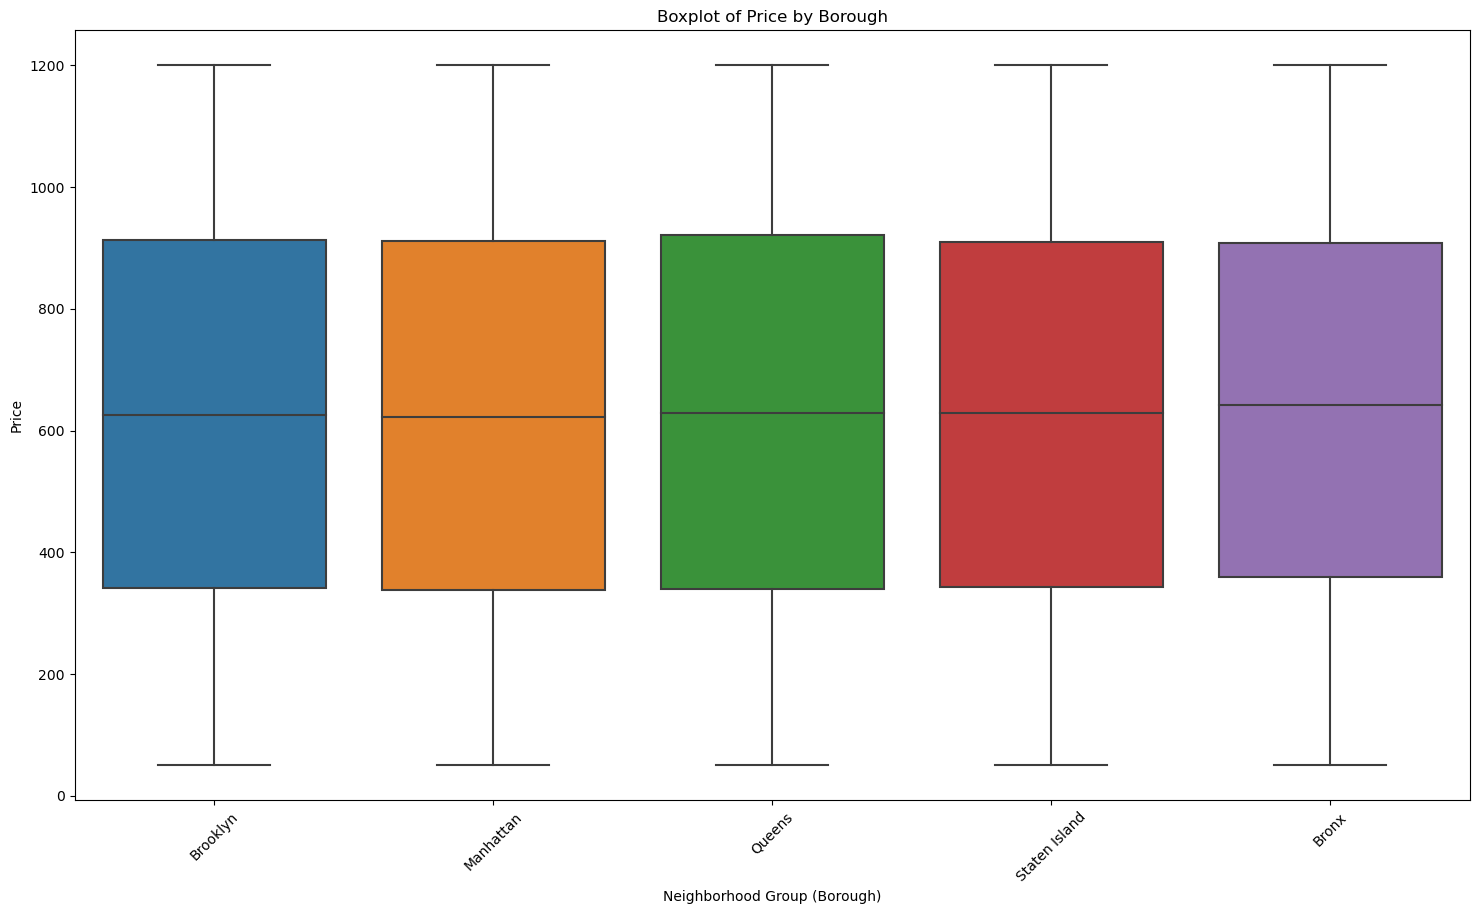

In [124]:
#Boxplot of all groups by price
#Making it bigger to see if there is any difference???
plt.figure(figsize=(18, 10))
sns.boxplot(x='neighbourhood group', y='price', data=airbnb_df)
plt.title('Boxplot of Price by Borough')
plt.xlabel('Neighborhood Group (Borough)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Findings
As each borough has thousands (except Staten Island with 942) of listings, its suprising to see how similar the pricing data between them. To get a better comparison, let's take a look at the neighborhoods.

### Summary Statistics of Listing Price by Neighborhood

In [126]:
summary_stats = airbnb_df.groupby('neighbourhood')['price'].describe()
print(summary_stats)

                  count        mean         std    min    25%     50%  \
neighbourhood                                                           
Allerton           93.0  650.387097  373.245695   52.0  335.0   646.0   
Arden Heights       9.0  804.888889  277.260908  329.0  604.0   889.0   
Arrochar           50.0  626.840000  296.239379  116.0  368.5   648.0   
Arverne           221.0  647.837104  324.624091   86.0  361.0   676.0   
Astoria          1841.0  638.609451  333.240110   50.0  363.0   645.0   
...                 ...         ...         ...    ...    ...     ...   
Windsor Terrace   321.0  574.183801  338.517292   51.0  276.0   542.0   
Woodhaven         190.0  628.510526  342.171338   51.0  316.0   627.0   
Woodlawn           29.0  587.137931  326.634541  120.0  376.0   684.0   
Woodrow             3.0  709.333333  546.750705   78.0  551.5  1025.0   
Woodside          575.0  636.488696  334.948958   51.0  348.5   639.0   

                     75%     max  
neighbourhood  

We can already see this data has much more variety.

In [128]:
#first grab median prices 
median_prices = airbnb_df.groupby('neighbourhood')['price'].median().reset_index()
#adding counts
neighbourhood_counts = airbnb_df['neighbourhood'].value_counts().reset_index()
neighbourhood_counts.columns = ['neighbourhood', 'count']
#Make one table
median_prices = median_prices.merge(neighbourhood_counts, on='neighbourhood')
median_prices = median_prices.sort_values(by='price', ascending=False)
display(median_prices)

,neighbourhood,price,count
144,New Dorp,1044.0,4
35,"Chelsea, Staten Island",1042.0,1
222,Woodrow,1025.0,3
83,Fort Wadsworth,1024.0,2
110,Jamaica Hills,971.0,21
...,...,...,...
175,Rossville,247.0,3
21,Breezy Point,232.0,9
187,Spuyten Duyvil,215.0,9
168,Richmondtown,212.0,5


Count was added to the neighborhood pricing, to evaluate some potential outliers. As we can see Chelsea only has a single listing and Fort Wadsworth has 2 listings, which can be introducing bias to our analysis.

As there are over 200 neighborhoods, only the top and bottom 10 boxplots will be produced.

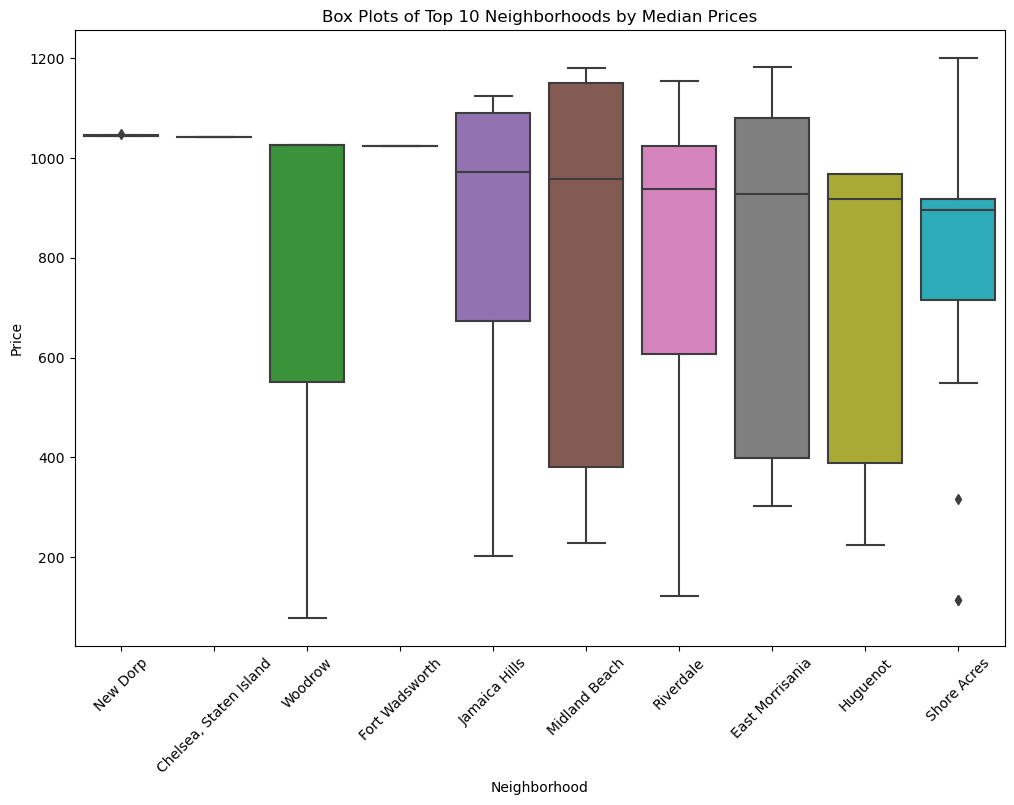

In [130]:
median_prices = airbnb_df.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(10)

top_10_neighborhoods = median_prices.index
filtered_df = airbnb_df[airbnb_df['neighbourhood'].isin(top_10_neighborhoods)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='price', data=filtered_df, order=top_10_neighborhoods)
plt.xticks(rotation=45)
plt.title('Box Plots of Top 10 Neighborhoods by Median Prices')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

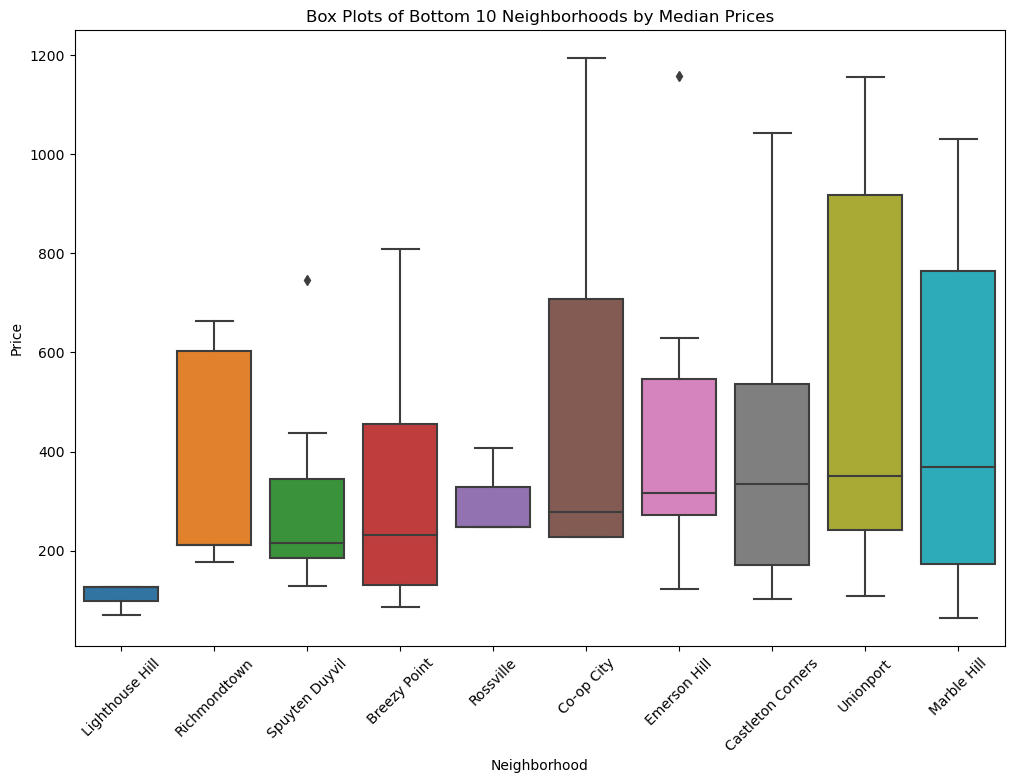

In [131]:
mean_prices = airbnb_df.groupby('neighbourhood')['price'].median().sort_values(ascending=True).head(10)

bottom_10_neighborhoods = mean_prices.index
filtered_df = airbnb_df[airbnb_df['neighbourhood'].isin(bottom_10_neighborhoods)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='price', data=filtered_df, order=bottom_10_neighborhoods)
plt.xticks(rotation=45)
plt.title('Box Plots of Bottom 10 Neighborhoods by Median Prices')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

### Findings
The goal of these boxplots are to ensure that there is some price variety between the regions of New York. The neighborhoods have a clear distinction where as the Borough level has no appreciable difference in price.


### Histogram of Construction Year by Borough
As the prices by borough had little variation, this plot will explore if any boroughs represent more recent construction on AirBnB compared to other years.

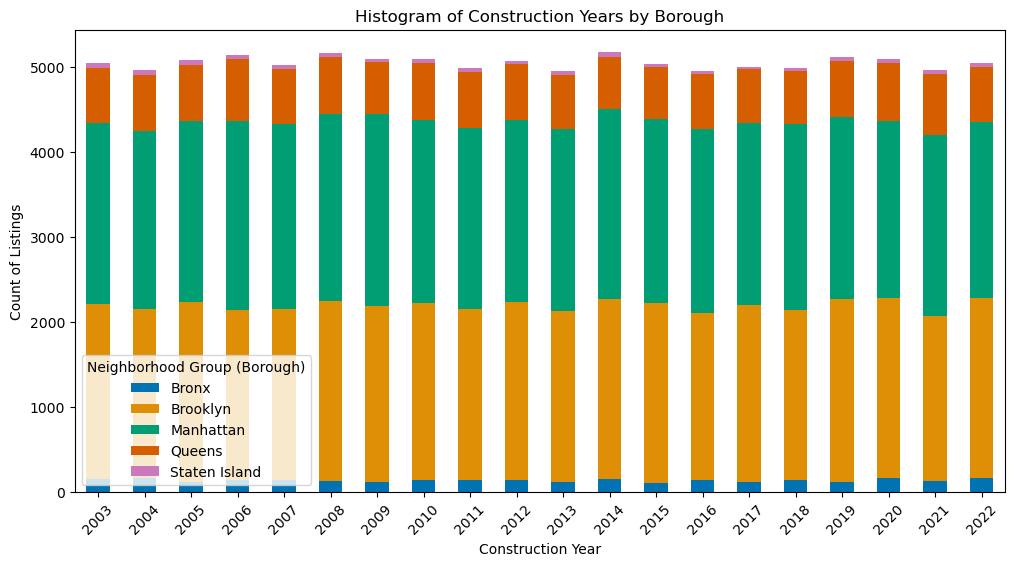

In [250]:
#pivot table for construction, borough, and year
conyr_neigh_df = airbnb_df.pivot_table(index='Construction year', columns='neighbourhood group', aggfunc='size', fill_value=0)
#play with the color
sns.set_palette('colorblind')
conyr_neigh_df.plot(kind='bar', stacked=True, figsize=(12, 6))
color=sns.color_palette('colorblind', n_colors=len(conyr_neigh_df.columns))
plt.xlabel('Construction Year')
plt.ylabel('Count of Listings')
plt.title('Histogram of Construction Years by Borough')
plt.legend(title='Neighborhood Group (Borough)')
plt.xticks(rotation=45)
plt.show()

### Findings
Surprisingly, the listings on AirBnB have about the same amount of representaion between all construction years at approximatly 5000 listings. The proportion of listings is also consitent by construction year.  Staten Island and the Bronx have the least number of listings in each year, followed by Queens and finally Brooklyn and Manhattan.  One surprising item from this analysis is that the number of listings is not proportional to the population of each borough [2]. Brooklyn and Queens have well over 2 Million people, where as the Bronx and Manhattan each have around 1.5 Million residents.  Manhaattan has the most listings, this could be due to its popularity as a travel desination.  Reegardless, it could be an area of further analysis.

### Construction Year to Price

Further exploring the construction years, the next plots will include Price.

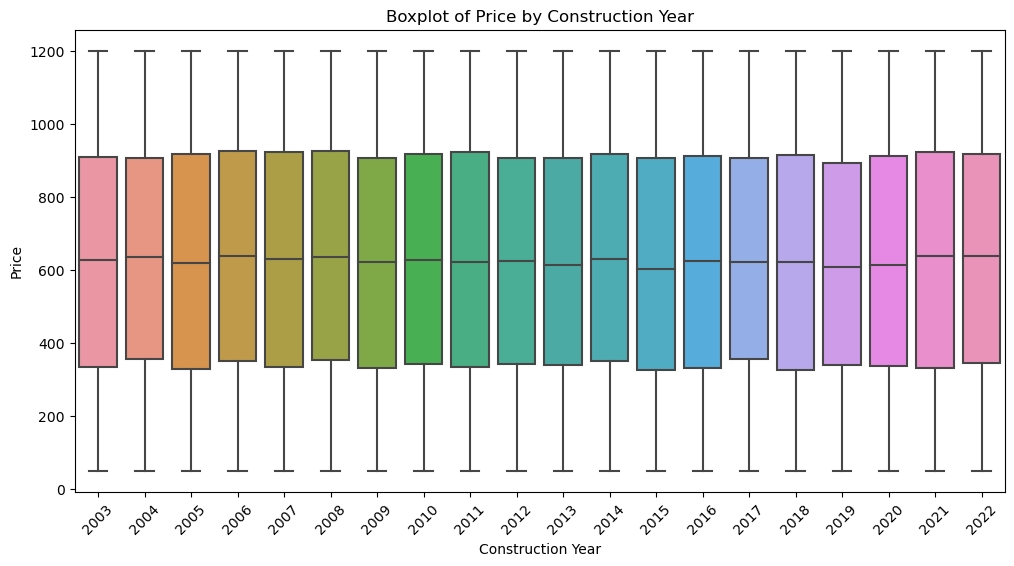

In [137]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Construction year', y='price', data=airbnb_df)
plt.title('Boxplot of Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

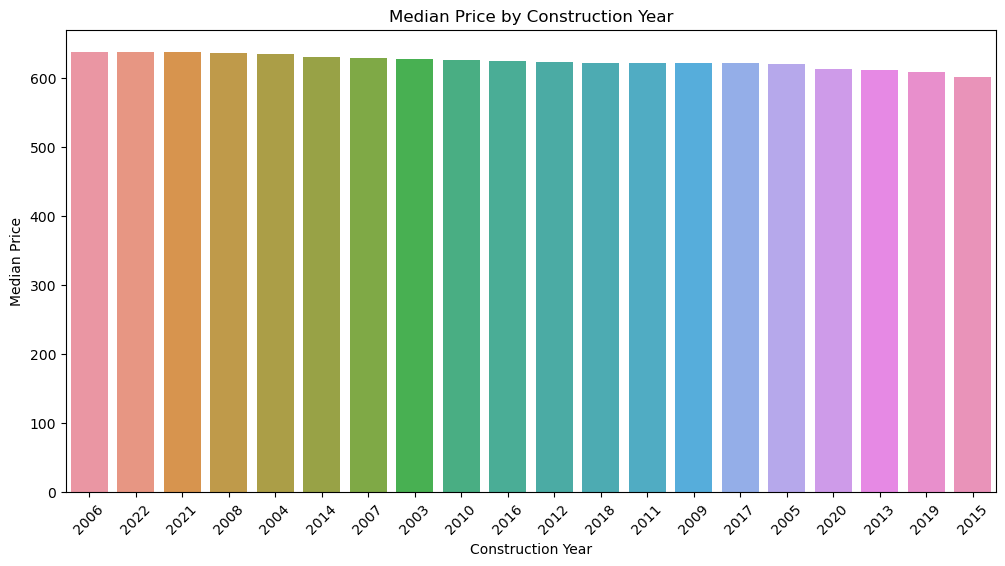

In [138]:
#group and calculate by year and price
median_price_cons = airbnb_df.groupby('Construction year')['price'].median().reset_index()

#Make sure its sorted
median_price_cons = median_price_cons.sort_values(by='price', ascending=False)

#  Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Construction year', y='price', data=median_price_cons, order=median_price_cons['Construction year'])
plt.title('Median Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

### Findings
Boxplots of the data do not indicate any special findings, every year runs the maximum and minimum prices you can set on AirBnB, 1200 and 50 respectively. One would expect that newer construction would be more expensive to rent, but there does not appear to be a major difference between years.  The second plot, sorting by median price begins to show this expected relationship with 2022 and 2021 being second and third, but it is a surprise that 2006, 2008, and 2004 all appear in the top 5 median price.  An area of further analysis would be to include the room type.  It could be that entire homes were built earlier and could be the cause of this elevated price. 

Overall, one of the more surprising things about this data set is that it is incredibly consitant.  It gives a concern that this data was manipulated in some way prior to being published.

### Correlation Analysis

In order to perform a complete Correlation Analaysis and build a plot, we will have to drop all possible null values, removing the null records not previously addressed in the "Reviews per month" column.

In [142]:
#pick out the numeric columns that arent identifiers
selected_columns = ['price', 'service fee', 'minimum nights', 'number of reviews', 
                    'reviews per month', 'review rate number', 
                    'calculated host listings count', 'availability 365']
numeric_var_df = airbnb_df[selected_columns]

In [143]:
#Remove any nulls
numeric_var_df = numeric_var_df.dropna()

In [144]:
correlation_matrix = numeric_var_df.corr()

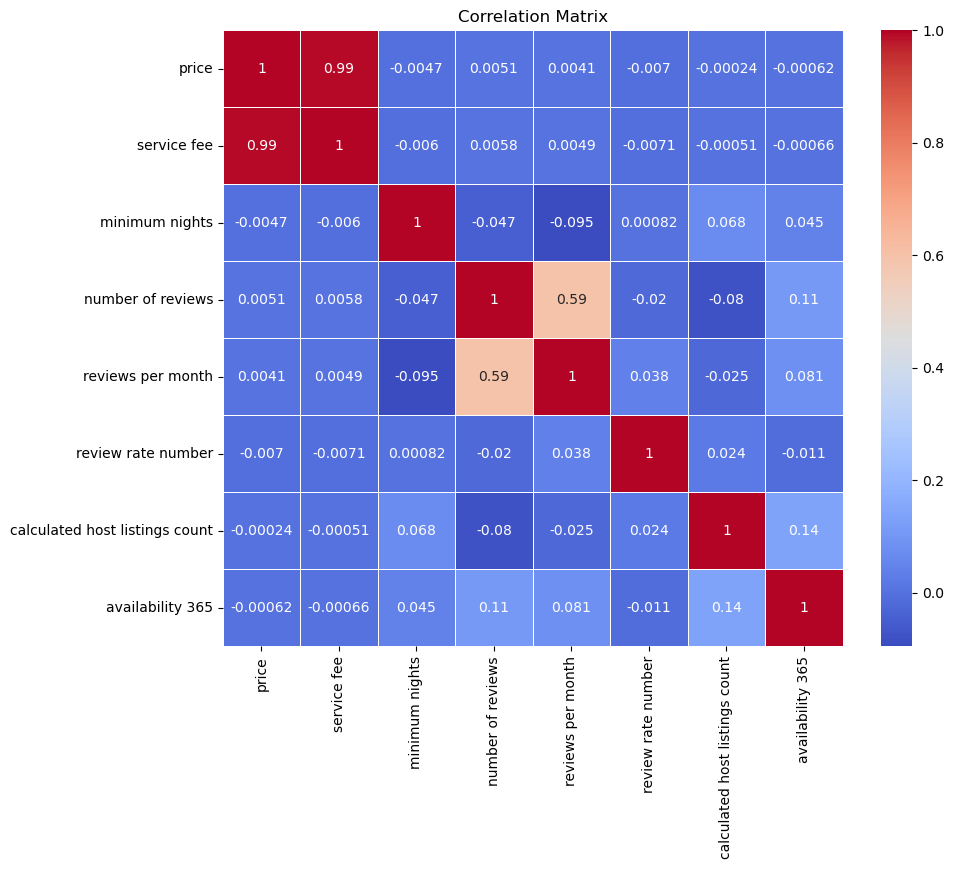

In [145]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Findings

Unfortunatly, the correlation matrix doesn't show many surprising relationships. Price and Service Fee have an incredibly strong relationship at 0.99 and are independant, but could be explained that as the property increases in rental cost so too does the cost to clean the property. Number of Reviews and Reviews Per months have a coefficient of 0.59, but this relationship is dependent and thus of little value. No other correlations have elevated coefficients.

# Refereces

[1] A. Azmoudeh, “Airbnb Open Data.” New York, Feb. 28, 2022 
https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data (accessed Sep. 19, 2024).

[2] “U.S. Census Bureau quickfacts,” U.S. Census Bureau
https://www.census.gov/quickfacts/fact/table/queenscountynewyork,kingscountynewyork,bronxcountynewyork,newyorkcountynewyork,richmondcountynewyork,newyorkcitynewyork/INC110219 (accessed Sep. 30, 2024). 